In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import math
import numpy as np

# Conversion rate for each products


In [3]:
# wood density
wood_density = 460

# carbon content
carbon_content = 0.5


# sawdust to pellet 1.56:1
pellet_conversion_rate = 1.56

# (Röder et al., 2015)
pellet_heat_value = 16.5 # unit MJ/kg
mj_to_kwh = 0.277777778 # heat value to kwh
CHP_conversion_efficiency = 0.8

# pulp to pulp 1.1:1
paper_conversion_rate = 1.1


# lumber to CLT 1.24:1 , reference: (Athena, 2022)

clt_conversion_rate = 1.24


# Emision factor in each life cycle stage

In [4]:
# unit for the harvesting emission is kgGHG/ha
co2_harvester_factor = 3.45 #fake
ch4_harvester_factor = 0.07 #fake
n2o_harvester_factor = 0.00008 #fake

co2_skidder_factor = 16.78 #fake
ch4_skidder_factor = 0.004 #fake
n2o_skidder_factor = 0.00000002 #fake

# following is the emission factor for fetilization emission
co2_fert_factor = 17.13779467
ch4_fert_factor = 0.055734646
n2o_fert_once_factor = 20.00206748
n2o_fert_twice_factor = 40.00206748
n2o_fert_twice_factor = 60.00206748

# unit for the harvested wood products emission are kgGHG/kgProduct
# manufacturing emission
co2_pellet_manu_factor = 0.189381356
ch4_pellet_manu_factor = 0.000589218
n2o_pellet_manu_factor = 9.45999E-06

#CLT manu data 
#unit kgGHG/m3
co2_clt_manu_factor = 173.5675192
ch4_clt_manu_factor = 0.661187758
n2o_clt_manu_factor = 0.012283183

#paper manu data
co2_paper_manu_factor = 2.68272497
ch4_paper_manu_factor = 0.008349122
n2o_paper_manu_factor = 7.74546E-05

#transportation emission
co2_pellet_trans_factor = 0.224768162
ch4_pellet_trans_factor = 2.57603E-05
n2o_pellet_trans_factor = 5.0852E-06


# concrete production emission kgGHG/m3
co2_concrete_manu_factor = 297.991587
ch4_concrete_manu_factor = 0.555939939
n2o_concrete_manu_factor = 0.003367478

# electricity production emission kgGHG/kwh
co2_electricity_manu_factor = 0.975309365
ch4_electricity_manu_factor = 0.002796801
n2o_electricity_manu_factor = 1.06334E-05


# Decay and landfill assumption

In [5]:
half_life_constructural_lumber = 35
building_life_clt = 100
half_life_paper = 2

# (IPCC, 2006) Volume 5 Chapter 3 - SOLID WASTE DISPOSAL 
half_life_landfill_constructural_lumber = 35
half_life_landfill_newspaper = 17 
#Methane Correction Factor(IPCC, 2006)
landfill_mcf = 0.4

#Fraction of CH4 in generated Landfill Gas (F) = 0.5 (IPCC, 2006)
landfill_f = 0.5

#Methane Recovery (Anshassi et al., 2021)
landfill_r = 0.75

#Oxidation  Factor 
landfill_ox = 0



In [6]:

# Read the CSV file and convert it into a DataFrame
df_emission_calculation = pd.read_csv('model_result/emission_calculation/emission_calculation_base.csv')
df_emission_calculation.drop('Unnamed: 0', axis=1, inplace=True)
df_emission_calculation

,period,plumber,pbark,pchips,psawdust,pshaving,ptrim,oha,fert_area,co2_seq,co2_dom_emission
0,1.0,17963.888608,733.675928,2462.925238,511.656946,279.678473,184.518982,91.959491,0.0,5.075978e+06,45352.130422
1,2.0,17265.807889,675.902259,2317.379173,482.787328,289.672397,193.114931,96.557466,0.0,5.439022e+06,52262.725792
2,3.0,18837.705097,803.336889,2536.198674,513.616549,298.418863,189.579960,96.557466,0.0,4.852307e+06,52401.846276
3,4.0,18981.827583,748.290071,2534.542611,531.045870,313.801668,193.114931,96.557466,0.0,4.745111e+06,52635.188173
4,5.0,18935.982598,794.131180,2524.093001,535.077991,282.403875,180.685016,96.557466,0.0,4.743993e+06,52755.338705
5,6.0,18867.218179,750.551907,2507.577037,539.370188,310.121680,212.372967,96.557466,0.0,4.571167e+06,52799.452581
6,7.0,18455.405705,750.907701,2466.326073,514.476524,300.235462,203.677996,96.557466,0.0,4.343136e+06,52839.221438
7,8.0,19046.458037,789.372239,2554.809834,536.911802,302.126237,194.743877,87.361516,0.0,4.374319e+06,52811.574501
8,9.0,18911.977578,811.597940,2514.333701,522.476319,303.779538,201.760105,87.361516,0.0,4.127216e+06,52844.527821
9,10.0,18799.957161,787.483863,2515.026690,503.251381,295.306449,196.870966,87.361516,0.0,4.195562e+06,52808.986143


# Harvesting emission calculation

In [7]:

df_emission_harvesting = {'period':[],'co2_harvester':[],'ch4_harvester':[],'n2o_harvester':[],'co2_skidder':[],'ch4_skidder':[],'n2o_skidder':[]}
# Iterate through the 'period' column and retrieve values from the 'oha' column
for period_value in df_emission_calculation['period']:
    oha_value = df_emission_calculation.loc[df_emission_calculation['period'] == period_value, 'oha'].values[0]
    co2_harvester = co2_harvester_factor * oha_value
    ch4_harvester = ch4_harvester_factor * oha_value
    n2o_harvester = n2o_harvester_factor * oha_value
    
    co2_skidder = co2_skidder_factor * oha_value
    ch4_skidder = ch4_skidder_factor * oha_value
    n2o_skidder = n2o_skidder_factor * oha_value
    
    df_emission_harvesting['period'].append(period_value)
    df_emission_harvesting['co2_harvester'].append(co2_harvester)
    df_emission_harvesting['ch4_harvester'].append(ch4_harvester)
    df_emission_harvesting['n2o_harvester'].append(n2o_harvester)
    df_emission_harvesting['co2_skidder'].append(co2_skidder)
    df_emission_harvesting['ch4_skidder'].append(ch4_skidder)
    df_emission_harvesting['n2o_skidder'].append(n2o_skidder)

# Create a DataFrame from the dictionary
df_emission_harvesting = pd.DataFrame(df_emission_harvesting)

df_emission_harvesting

,period,co2_harvester,ch4_harvester,n2o_harvester,co2_skidder,ch4_skidder,n2o_skidder
0,1.0,317.260244,6.437164,0.007357,1543.080259,0.367838,0.000002
1,2.0,333.123256,6.759023,0.007725,1620.234272,0.386230,0.000002
2,3.0,333.123256,6.759023,0.007725,1620.234272,0.386230,0.000002
3,4.0,333.123256,6.759023,0.007725,1620.234272,0.386230,0.000002
4,5.0,333.123256,6.759023,0.007725,1620.234272,0.386230,0.000002
5,6.0,333.123256,6.759023,0.007725,1620.234272,0.386230,0.000002
6,7.0,333.123256,6.759023,0.007725,1620.234272,0.386230,0.000002
7,8.0,301.397232,6.115306,0.006989,1465.926246,0.349446,0.000002
8,9.0,301.397232,6.115306,0.006989,1465.926246,0.349446,0.000002
9,10.0,301.397232,6.115306,0.006989,1465.926246,0.349446,0.000002


# Fertilization emission calculation

In [8]:
df_emission_fertilization = {'period':[],'co2_fert':[],'ch4_fert':[],'n2o_fert':[]}
# Iterate through the 'period' column and retrieve values from the 'oha' column
for index, row in df_emission_calculation.iterrows():
    period_value = row['period']
    fert_area_value = row['fert_area']
    
    co2_fert = fert_area_value * co2_fert_factor
    ch4_fert = fert_area_value * ch4_fert_factor
    n2o_fert = fert_area_value * n2o_fert_once_factor
    
    df_emission_fertilization['period'].append(period_value)
    df_emission_fertilization['co2_fert'].append(co2_fert)
    df_emission_fertilization['ch4_fert'].append(ch4_fert)
    df_emission_fertilization['n2o_fert'].append(n2o_fert)
    
    
    
df_emission_fertilization = pd.DataFrame(df_emission_fertilization)
df_emission_fertilization

,period,co2_fert,ch4_fert,n2o_fert
0,1.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0
5,6.0,0.0,0.0,0.0
6,7.0,0.0,0.0,0.0
7,8.0,0.0,0.0,0.0
8,9.0,0.0,0.0,0.0
9,10.0,0.0,0.0,0.0


# HWP manufacturing emission calculation

In [9]:
#pellet manufacturing emission
df_emission_pellet_manu = {'period':[],'co2_pellet_manu':[],'ch4_pellet_manu':[],'n2o_pellet_manu':[]}

for index, row in df_emission_calculation.iterrows():
    period_value = row['period']
    pellet_volume = (row['psawdust'] + row['pshaving'] ) / pellet_conversion_rate
    
    co2_pellet_manu = pellet_volume * co2_pellet_manu_factor
    ch4_pellet_manu = pellet_volume * ch4_pellet_manu_factor
    n2o_pellet_manu = pellet_volume * n2o_pellet_manu_factor
    
    df_emission_pellet_manu['period'].append(period_value)
    df_emission_pellet_manu['co2_pellet_manu'].append(co2_pellet_manu)
    df_emission_pellet_manu['ch4_pellet_manu'].append(ch4_pellet_manu)
    df_emission_pellet_manu['n2o_pellet_manu'].append(n2o_pellet_manu)

df_emission_pellet_manu = pd.DataFrame(df_emission_pellet_manu)
df_emission_pellet_manu   
    

,period,co2_pellet_manu,ch4_pellet_manu,n2o_pellet_manu
0,1.0,96.066779,0.298890,0.004799
1,2.0,93.775301,0.291761,0.004684
2,3.0,98.579723,0.306709,0.004924
3,4.0,102.563059,0.319102,0.005123
4,5.0,99.240913,0.308766,0.004957
5,6.0,103.126873,0.320856,0.005151
6,7.0,98.904654,0.307720,0.004940
7,8.0,101.857796,0.316908,0.005088
8,9.0,100.306061,0.312080,0.005010
9,10.0,96.943567,0.301618,0.004843


In [10]:
# CLT 
# Create an empty dictionary for clt manufacturing emissions
df_emission_clt_manu = {'period': [], 'co2_clt_manu': [], 'ch4_clt_manu': [], 'n2o_clt_manu': []}

# Iterate through the rows of the DataFrame
for index, row in df_emission_calculation.iterrows():
    period_value = row['period']
    clt_volume = row['plumber'] / clt_conversion_rate
    
    co2_clt_manu = clt_volume * co2_clt_manu_factor
    ch4_clt_manu = clt_volume * ch4_clt_manu_factor
    n2o_clt_manu = clt_volume * n2o_clt_manu_factor
    
    df_emission_clt_manu['period'].append(period_value)
    df_emission_clt_manu['co2_clt_manu'].append(co2_clt_manu)
    df_emission_clt_manu['ch4_clt_manu'].append(ch4_clt_manu)
    df_emission_clt_manu['n2o_clt_manu'].append(n2o_clt_manu)

# Create a DataFrame from the dictionary
df_emission_clt_manu = pd.DataFrame(df_emission_clt_manu)

df_emission_clt_manu


,period,co2_clt_manu,ch4_clt_manu,n2o_clt_manu
0,1.0,2.514474e+06,9578.631640,177.946557
1,2.0,2.416761e+06,9206.403878,171.031514
2,3.0,2.636785e+06,10044.564515,186.602402
3,4.0,2.656959e+06,10121.412921,188.030050
4,5.0,2.650542e+06,10096.967645,187.575919
5,6.0,2.640916e+06,10060.301361,186.894753
6,7.0,2.583273e+06,9840.716388,182.815424
7,8.0,2.666005e+06,10155.874909,188.670266
8,9.0,2.647181e+06,10084.167785,187.338130
9,10.0,2.631502e+06,10024.436714,186.228479


In [11]:
#paper
df_emission_paper_manu = {'period': [], 'co2_paper_manu': [], 'ch4_paper_manu': [], 'n2o_paper_manu': []}

# Iterate through the rows of the DataFrame
for index, row in df_emission_calculation.iterrows():
    period_value = row['period']
    paper_volume = row['pchips'] / paper_conversion_rate
    
    co2_paper_manu = paper_volume * co2_paper_manu_factor
    ch4_paper_manu = paper_volume * ch4_paper_manu_factor
    n2o_paper_manu = paper_volume * n2o_paper_manu_factor
    
    df_emission_paper_manu['period'].append(period_value)
    df_emission_paper_manu['co2_paper_manu'].append(co2_paper_manu)
    df_emission_paper_manu['ch4_paper_manu'].append(ch4_paper_manu)
    df_emission_paper_manu['n2o_paper_manu'].append(n2o_paper_manu)

# Create a DataFrame from the dictionary
df_emission_paper_manu = pd.DataFrame(df_emission_paper_manu)

df_emission_paper_manu

,period,co2_paper_manu,ch4_paper_manu,n2o_paper_manu
0,1.0,6006.682760,18.693876,0.173423
1,2.0,5651.719065,17.589165,0.163174
2,3.0,6185.385010,19.250029,0.178582
3,4.0,6181.346137,19.237460,0.178465
4,5.0,6155.861200,19.158146,0.177730
5,6.0,6115.581391,19.032788,0.176567
6,7.0,6014.976854,18.719688,0.173662
7,8.0,6230.774669,19.391290,0.179893
8,9.0,6132.059821,19.084072,0.177042
9,10.0,6133.749911,19.089332,0.177091


# Transportation emission

In [12]:
# pellet
df_emission_pellet_trans = {'period': [], 'co2_pellet_trans': [], 'ch4_pellet_trans': [], 'n2o_pellet_trans': []}

# Iterate through the rows of the DataFrame
for index, row in df_emission_calculation.iterrows():
    period_value = row['period']
    pellet_volume = (row['psawdust'] + row['pshaving']) / pellet_conversion_rate
    
    co2_pellet_trans = pellet_volume * co2_pellet_trans_factor
    ch4_pellet_trans = pellet_volume * ch4_pellet_trans_factor
    n2o_pellet_trans = pellet_volume * n2o_pellet_trans_factor
    
    df_emission_pellet_trans['period'].append(period_value)
    df_emission_pellet_trans['co2_pellet_trans'].append(co2_pellet_trans)
    df_emission_pellet_trans['ch4_pellet_trans'].append(ch4_pellet_trans)
    df_emission_pellet_trans['n2o_pellet_trans'].append(n2o_pellet_trans)

# Create a DataFrame from the dictionary
df_emission_pellet_trans = pd.DataFrame(df_emission_pellet_trans)

df_emission_pellet_trans

,period,co2_pellet_trans,ch4_pellet_trans,n2o_pellet_trans
0,1.0,114.017313,0.013067,0.002580
1,2.0,111.297662,0.012756,0.002518
2,3.0,116.999812,0.013409,0.002647
3,4.0,121.727454,0.013951,0.002754
4,5.0,117.784549,0.013499,0.002665
5,6.0,122.396619,0.014028,0.002769
6,7.0,117.385459,0.013453,0.002656
7,8.0,120.890409,0.013855,0.002735
8,9.0,119.048724,0.013644,0.002693
9,10.0,115.057933,0.013187,0.002603


# Decay emission

## CLT and lumber decay emission

In [13]:
def first_order_decay_emission_total(initial_carbon_content, decay_constant, time):
    """
    Calculates the emission using the first-order decay model.
    """
    emission = initial_carbon_content * (1 - np.exp(-decay_constant * time))
    return emission

def first_order_decay_emission_periodic(initial_carbon_content, decay_constant, time_present, time_previous):
    """
    Calculates the emission using the first-order decay model.
    """
    emission = initial_carbon_content * (1 - np.exp(-decay_constant * time_present)) - initial_carbon_content * (1 - np.exp(-decay_constant * time_previous))
    return emission

def first_order_decay_left_carbon_content(initial_carbon_content, decay_constant, time):
    """
    Calculates the emission using the first-order decay model.
    """
    emission = initial_carbon_content * (np.exp(-decay_constant * time))
    return emission

def decay_constant(half_life):
    k = math.log(2) / half_life
    return k


In [14]:
# lumber allocation rate
clt_percentage = 0
lumber_percentage = 1 - clt_percentage



df_clt_emission = pd.read_excel('data/CLT_emission.xlsx', engine='openpyxl')

# Group by 'timestep' column with every 10 steps and 'Emission' column, then calculate the sum of the 'BL100' column
result = df_clt_emission.groupby([(df_clt_emission['timestep'] // 10) + 1, 'Emission'])['BL100'].sum().reset_index()

# Rename columns in the result DataFrame
result.columns = ['timestep_10', 'Emission', 'BL100_sum']

# Filter the result DataFrame for CO2 and CH4 separately
result_co2 = result.query("Emission == 'CO2'")
result_ch4 = result.query("Emission == 'CH4'")

CLT_co2_emission = result_co2
CLT_ch4_emission = result_ch4

CLT_co2_emission.drop('Emission', axis=1, inplace=True)
CLT_ch4_emission.drop('Emission', axis=1, inplace=True)

CLT_co2_emission.replace('')

df_emission_clt_volume = {'timestep':[],'clt_volume':[]}

df_emission_clt_volume['timestep'] = df_emission_calculation['period']
df_emission_clt_volume['clt_volume'] = df_emission_calculation['plumber'] / clt_conversion_rate * clt_percentage


df_emission_clt_volume = pd.DataFrame(df_emission_clt_volume)

total_co2_emission = []
total_ch4_emission = []

# Iterate through the periods (1 to 20)
for period in range(1, 21):
    total_co2_emission_period = 0
    total_ch4_emission_period = 0

    for timestep in range(1, period + 1):
        # Calculate the corresponding lumber volume and emission values
        lumber_volume = df_emission_clt_volume.loc[df_emission_clt_volume['timestep'] == timestep, 'clt_volume'].iloc[0] 
        co2_emission = CLT_co2_emission.loc[CLT_co2_emission['timestep_10'] == (period - timestep + 1), 'BL100_sum'].iloc[0]
        ch4_emission = CLT_ch4_emission.loc[CLT_ch4_emission['timestep_10'] == (period - timestep + 1), 'BL100_sum'].iloc[0]

        # Calculate the emission for the current timestep and add it to the total_emission
        total_co2_emission_period += lumber_volume * co2_emission
        total_ch4_emission_period += lumber_volume * ch4_emission

    # Append the total_emission for the current period to the total_emissions list
    total_co2_emission.append(total_co2_emission_period)
    total_ch4_emission.append(total_ch4_emission_period)

# Create a DataFrame with the total emissions for each period
df_emission_clt_decay = pd.DataFrame({'period': list(range(1, 21)), 'co2_clt_decay': total_co2_emission, 'ch4_clt_decay': total_ch4_emission})

# constructural lumber emission calculation
half_life_constructural_lumber = 35

decay_constant_lumber = decay_constant(half_life_constructural_lumber)

df_emission_lumber_volume = pd.DataFrame({'timestep': df_emission_calculation['period'], 'lumber_volume': df_emission_calculation['plumber'] * lumber_percentage})


# df_emission_lumber_volume = pd.DataFrame({'timestep': df_emission_calculation['period'], 'lumber_volume': df_emission_calculation['plumber'] })
total_co2_emission = []

for period in range(1, 21):
    total_co2_emission_period = 0

    for step in range(max(1, period - 5 + 1), period + 1):  # Calculate only for the previous 5 periods and the current one
        C0_volume = df_emission_lumber_volume.loc[df_emission_lumber_volume['timestep'] == step, 'lumber_volume'].iloc[0]
        C0 = C0_volume * wood_density * carbon_content  # Convert volume to carbon content
        C_emission = first_order_decay_emission_periodic(C0, decay_constant(half_life_landfill_constructural_lumber), (period - step +1 ) * 10, (period - step) * 10)  # Remaining at the end of the period
        co2_emission = C_emission  # Decay during the period
        total_co2_emission_period += co2_emission  # Changed 'emission' to 'co2_emission'
        
    total_co2_emission.append(total_co2_emission_period)

df_emission_lumber_decay = pd.DataFrame({'period': list(range(1, 21)), 'co2_lumber_decay': total_co2_emission})
df_emission_clt_decay


/tmp/ipykernel_1711718/561558938.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CLT_co2_emission.drop('Emission', axis=1, inplace=True)
/tmp/ipykernel_1711718/561558938.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CLT_ch4_emission.drop('Emission', axis=1, inplace=True)


,period,co2_clt_decay,ch4_clt_decay
0,1,0.0,0.0
1,2,0.0,0.0
2,3,0.0,0.0
3,4,0.0,0.0
4,5,0.0,0.0
5,6,0.0,0.0
6,7,0.0,0.0
7,8,0.0,0.0
8,9,0.0,0.0
9,10,0.0,0.0


In [15]:
# landfill decay calculated



df_landfill_entry_carboncontent = {'period':[],'landfill_entry_period':[],'lumber_carbon_content':[]}
df_landfill_entry_carboncontent = pd.DataFrame(df_landfill_entry_carboncontent)

df_landfill_entry_carboncontent['period'] = range(1,21)
df_landfill_entry_carboncontent['landfill_entry_period'] = range(6,26)
df_landfill_entry_carboncontent['lumber_carbon_content'] = df_emission_lumber_volume['lumber_volume'] * wood_density * carbon_content

df_landfill_entry_carboncontent['lumber_carbon_content'] = first_order_decay_left_carbon_content(df_landfill_entry_carboncontent['lumber_carbon_content'],decay_constant_lumber,60)
# print(decay_constant_lumber)
df_landfill_entry_carboncontent

df_emission_landfill_lumber = {}

total_co2_emission_landfill_lumber = []  # Define an empty list outside the loop
total_ch4_emission_landfill_lumber = []


for period in range(1, 21):
    total_co2_emission_period_landfill_lumber = 0
    total_ch4_emission_period_landfill_lumber = 0

    for step in range(1, period + 1):
        entry_carbon_content = df_landfill_entry_carboncontent.loc[df_landfill_entry_carboncontent['period'] == period, 'lumber_carbon_content'].iloc[0]
        C_emission = first_order_decay_emission_periodic(entry_carbon_content, half_life_landfill_constructural_lumber, (period - step +1 ) * 10, (period - step) * 10)  # Remaining at the end of the period
        co2_emission_landfill_lumber = C_emission  # Decay during the period
        ch4_emission_landfill_lumber = (C_emission * landfill_mcf * landfill_f * 16 / 12) * (1 - landfill_r) * (1 - landfill_ox)
        total_ch4_emission_period_landfill_lumber += ch4_emission_landfill_lumber
        total_co2_emission_period_landfill_lumber += co2_emission_landfill_lumber

    total_co2_emission_landfill_lumber.append(total_co2_emission_period_landfill_lumber)
    total_ch4_emission_landfill_lumber.append(total_ch4_emission_period_landfill_lumber)

df_emission_landfill_lumber = pd.DataFrame({'period': list(range(6, 26)),
                                            'co2_lumber_landfill_decay': total_co2_emission_landfill_lumber,
                                            'ch4_lumber_landfill_decay': total_ch4_emission_landfill_lumber})

df_emission_landfill_lumber

# merge_df = pd.merge(df_emission_lumber_decay, df_emission_landfill_lumber, on='period')

# create a dataframe with 'period' values 1-5
df_to_append = pd.DataFrame({'period': range(1, 6)})

# append this dataframe to df_emission_landfill_lumber
df_emission_landfill_lumber = df_emission_landfill_lumber.append(df_to_append)

# reset the index, if necessary
df_emission_landfill_lumber = df_emission_landfill_lumber.reset_index(drop=True)

# now perform the merge
merge_df = pd.merge(df_emission_lumber_decay, df_emission_landfill_lumber, on='period', how='outer')

merge_df = merge_df.drop(index=range(20, 25))

merge_df = merge_df.fillna(0)

# create the new 'co2_constructional_lumber' column
merge_df['co2_constructional_lumber_decay'] = merge_df['co2_lumber_decay'] + merge_df['co2_lumber_landfill_decay']

# rename the 'ch4_lumber_landfill_decay' column
merge_df.rename(columns={'ch4_lumber_landfill_decay': 'ch4_constructional_lumber_decay'}, inplace=True)

df_emission_constructional_lumber_decay = merge_df[['period', 'co2_constructional_lumber_decay', 'ch4_constructional_lumber_decay']].copy()

df_emission_constructional_lumber_decay

/tmp/ipykernel_1711718/1949279158.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_emission_landfill_lumber = df_emission_landfill_lumber.append(df_to_append)


,period,co2_constructional_lumber_decay,ch4_constructional_lumber_decay
0,1,7.423194e+05,0.000000
1,2,1.322424e+06,0.000000
2,3,1.863259e+06,0.000000
3,4,2.312881e+06,0.000000
4,5,2.679827e+06,0.000000
5,6,3.961382e+06,83943.197735
6,7,3.924531e+06,80681.146344
7,8,4.044914e+06,88026.442287
8,9,4.055616e+06,88699.910186
9,10,4.048970e+06,88485.681815


# newspaper decay emission

In [16]:
df_emission_newspaper_volume = pd.DataFrame({'timestep': df_emission_calculation['period'], 
                                             'newspaper_weight': df_emission_calculation['pchips'] * 1000})

total_co2_newspaper_decay = []

for period in range(1, 21):
    total_co2_emission_period = 0

    for step in range(max(1, period - 1 + 1), period + 1):  
        C0_volume = df_emission_newspaper_volume.loc[df_emission_newspaper_volume['timestep'] == step, 'newspaper_weight'].iloc[0]
        C0 = C0_volume * carbon_content  
        C_emission = first_order_decay_emission_periodic(C0, decay_constant(half_life_paper), (period - step + 1) * 10, (period - step) * 10)
        co2_emission = C_emission  
        total_co2_emission_period += co2_emission  

    total_co2_newspaper_decay.append(total_co2_emission_period)

df_emission_newspaper_lifetime = pd.DataFrame({'period': list(range(1, 21)), 'co2_newspaper_decay': total_co2_newspaper_decay})




# landfill emission start from here


decay_constant_newspaper = decay_constant(half_life_paper)

df_landfill_entry_carboncontent = {'period':[],'landfill_entry_period':[],'newspaper_carbon_content':[]}
df_landfill_entry_carboncontent = pd.DataFrame(df_landfill_entry_carboncontent)

df_landfill_entry_carboncontent['period'] = range(1,21)
df_landfill_entry_carboncontent['landfill_entry_period'] = range(2,22)
df_landfill_entry_carboncontent['newspaper_carbon_content'] = df_emission_newspaper_volume['newspaper_weight'] * carbon_content

df_landfill_entry_carboncontent['newspaper_carbon_content'] = first_order_decay_left_carbon_content(df_landfill_entry_carboncontent['newspaper_carbon_content'],decay_constant_newspaper,10)

df_emission_landfill_newspaper = {}

total_co2_emission_landfill_newspaper = []  # Define an empty list outside the loop
total_ch4_emission_landfill_newspaper = []

for period in range(1, 21):
    total_co2_emission_period_landfill_newspaper = 0
    total_ch4_emission_period_landfill_newspaper = 0

    for step in range(1, period + 1):
        entry_carbon_content = df_landfill_entry_carboncontent.loc[df_landfill_entry_carboncontent['period'] == period, 'newspaper_carbon_content'].iloc[0]
        C_emission = first_order_decay_emission_periodic(entry_carbon_content, half_life_landfill_newspaper, (period - step +1 ) * 10, (period - step) * 10)  # Remaining at the end of the period
        co2_emission_landfill_newspaper = C_emission  # Decay during the period
        ch4_emission_landfill_newspaper = (C_emission * landfill_mcf * landfill_f * 16 / 12) * (1 - landfill_r) * (1 - landfill_ox)
        total_ch4_emission_period_landfill_newspaper += ch4_emission_landfill_newspaper
        total_co2_emission_period_landfill_newspaper += co2_emission_landfill_newspaper

    total_co2_emission_landfill_newspaper.append(total_co2_emission_period_landfill_newspaper)
    total_ch4_emission_landfill_newspaper.append(total_ch4_emission_period_landfill_newspaper)

df_emission_landfill_newspaper = pd.DataFrame({'period': list(range(2, 22)),
                                            'co2_newspaper_landfill_decay': total_co2_emission_landfill_newspaper,
                                            'ch4_newspaper_landfill_decay': total_ch4_emission_landfill_newspaper})

df_emission_landfill_newspaper

# merge to get a total emission combine the lifecyle and landfill cycle


df_to_append = pd.DataFrame({'period': range(1, 2)})

# append this dataframe to df_emission_landfill_lumber
df_emission_landfill_newspaper = df_emission_landfill_newspaper.append(df_to_append)

df_emission_landfill_newspaper = df_emission_landfill_newspaper.reset_index(drop=True)

# now perform the merge
merge_df = pd.merge(df_emission_newspaper_lifetime, df_emission_landfill_newspaper, on='period', how='outer')

merge_df = merge_df.drop(index=range(20, 21))

merge_df = merge_df.fillna(0)

# create the new 'co2_constructional_lumber' column
merge_df['co2_newspaper_decay'] = merge_df['co2_newspaper_decay'] + merge_df['co2_newspaper_landfill_decay']

# rename the 'ch4_lumber_landfill_decay' column
merge_df.rename(columns={'ch4_newspaper_landfill_decay': 'ch4_newspaper_decay'}, inplace=True)

df_emission_newspaper_decay = merge_df[['period', 'co2_newspaper_decay', 'ch4_newspaper_decay']].copy()

df_emission_newspaper_decay
# merge_df

/tmp/ipykernel_1711718/114462318.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_emission_landfill_newspaper = df_emission_landfill_newspaper.append(df_to_append)


,period,co2_newspaper_decay,ch4_newspaper_decay
0,1,1.192979e+06,0.000000
1,2,1.160964e+06,2565.547123
2,3,1.264680e+06,2413.936638
3,4,1.267297e+06,2641.873619
4,5,1.262210e+06,2640.148553
5,6,1.254047e+06,2629.263543
6,7,1.233808e+06,2612.059413
7,8,1.276022e+06,2569.089659
8,9,1.257799e+06,2661.260244
9,10,1.257503e+06,2619.097606


# Pellet burning emission

In [17]:
df_emission_pellet_burn = {'period': [], 'co2_pellet_burn': []}

# Iterate through the rows of the DataFrame
for index, row in df_emission_calculation.iterrows():
    period_value = row['period']
    pellet_volume = row['psawdust'] + row['pshaving']
    
    co2_pellet_burn = pellet_volume * 1000 * 0.5
    
    df_emission_pellet_burn['period'].append(period_value)
    df_emission_pellet_burn['co2_pellet_burn'].append(co2_pellet_burn)

# Create a DataFrame from the dictionary
df_emission_pellet_burn = pd.DataFrame(df_emission_pellet_burn)

df_emission_pellet_burn


,period,co2_pellet_burn
0,1.0,395667.709393
1,2.0,386229.862100
2,3.0,406017.706262
3,4.0,422423.768509
4,5.0,408740.932959
5,6.0,424745.933891
6,7.0,407355.992778
7,8.0,419519.019721
8,9.0,413127.928176
9,10.0,399278.914995


# Substitution emission calculation

## Concrete was substituted by CLT with same volume e.g. 1 m3 replace 1 m3

In [18]:
df_emission_concrete_manu = {'period': [], 'co2_concrete_manu': [], 'ch4_concrete_manu': [], 'n2o_concrete_manu': []}

# Iterate through the rows of the DataFrame
for index, row in df_emission_calculation.iterrows():
    period_value = row['period']
    concrete_volume = row['plumber'] / clt_conversion_rate * clt_percentage
    
    co2_concrete_manu = concrete_volume * co2_concrete_manu_factor
    ch4_concrete_manu = concrete_volume * ch4_concrete_manu_factor
    n2o_concrete_manu = concrete_volume * n2o_concrete_manu_factor
    
    df_emission_concrete_manu['period'].append(period_value)
    df_emission_concrete_manu['co2_concrete_manu'].append(co2_concrete_manu)
    df_emission_concrete_manu['ch4_concrete_manu'].append(ch4_concrete_manu)
    df_emission_concrete_manu['n2o_concrete_manu'].append(n2o_concrete_manu)

# Create a DataFrame from the dictionary
df_emission_concrete_manu = pd.DataFrame(df_emission_concrete_manu)

df_emission_concrete_manu


,period,co2_concrete_manu,ch4_concrete_manu,n2o_concrete_manu
0,1.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0
5,6.0,0.0,0.0,0.0
6,7.0,0.0,0.0,0.0
7,8.0,0.0,0.0,0.0
8,9.0,0.0,0.0,0.0
9,10.0,0.0,0.0,0.0


## Electriticy generated by coal was substituted by pellet 

In [19]:
df_emission_electricity_manu = {'period': [], 'co2_electricity_manu': [], 'ch4_electricity_manu': [], 'n2o_electricity_manu': []}

# Iterate through the rows of the DataFrame
for index, row in df_emission_calculation.iterrows():
    period_value = row['period']
    electricity = (row['psawdust'] + row['pshaving']) / pellet_conversion_rate * pellet_heat_value * mj_to_kwh * CHP_conversion_efficiency
    
    co2_electricity_manu = electricity * co2_electricity_manu_factor
    ch4_electricity_manu = electricity * ch4_electricity_manu_factor
    n2o_electricity_manu = electricity * n2o_electricity_manu_factor
    
    df_emission_electricity_manu['period'].append(period_value)
    df_emission_electricity_manu['co2_electricity_manu'].append(co2_electricity_manu)
    df_emission_electricity_manu['ch4_electricity_manu'].append(ch4_electricity_manu)
    df_emission_electricity_manu['n2o_electricity_manu'].append(n2o_electricity_manu)

# Create a DataFrame from the dictionary
df_emission_electricity_manu = pd.DataFrame(df_emission_electricity_manu)

df_emission_electricity_manu


,period,co2_electricity_manu,ch4_electricity_manu,n2o_electricity_manu
0,1.0,1814.052414,5.201984,0.019778
1,2.0,1770.781889,5.077901,0.019306
2,3.0,1861.504952,5.338059,0.020295
3,4.0,1936.723263,5.553755,0.021115
4,5.0,1873.990368,5.373862,0.020431
5,6.0,1947.369898,5.584286,0.021231
6,7.0,1867.640711,5.355654,0.020362
7,8.0,1923.405607,5.515566,0.020970
8,9.0,1894.103809,5.431540,0.020651
9,10.0,1830.609025,5.249462,0.019958


In [20]:
dataframes = [
    df_emission_clt_decay,
    df_emission_clt_manu,
    df_emission_concrete_manu,
    df_emission_constructional_lumber_decay,
    df_emission_electricity_manu,
    df_emission_fertilization,
    df_emission_harvesting,
    df_emission_newspaper_decay,
    df_emission_paper_manu,
    df_emission_pellet_burn,
    df_emission_pellet_manu,
    df_emission_pellet_trans,
]

from functools import reduce

# use reduce to merge all dataframes
df_emission_periodic = reduce(lambda left,right: pd.merge(left,right,on='period'), dataframes)

df_emission_periodic = pd.merge(df_emission_periodic, df_emission_calculation[['period', 'co2_seq', 'co2_dom_emission']], on='period')


df_emission_periodic

,period,co2_clt_decay,ch4_clt_decay,co2_clt_manu,ch4_clt_manu,n2o_clt_manu,co2_concrete_manu,ch4_concrete_manu,n2o_concrete_manu,co2_constructional_lumber_decay,...,n2o_paper_manu,co2_pellet_burn,co2_pellet_manu,ch4_pellet_manu,n2o_pellet_manu,co2_pellet_trans,ch4_pellet_trans,n2o_pellet_trans,co2_seq,co2_dom_emission
0,1,0.0,0.0,2.514474e+06,9578.631640,177.946557,0.0,0.0,0.0,7.423194e+05,...,0.173423,395667.709393,96.066779,0.298890,0.004799,114.017313,0.013067,0.002580,5.075978e+06,45352.130422
1,2,0.0,0.0,2.416761e+06,9206.403878,171.031514,0.0,0.0,0.0,1.322424e+06,...,0.163174,386229.862100,93.775301,0.291761,0.004684,111.297662,0.012756,0.002518,5.439022e+06,52262.725792
2,3,0.0,0.0,2.636785e+06,10044.564515,186.602402,0.0,0.0,0.0,1.863259e+06,...,0.178582,406017.706262,98.579723,0.306709,0.004924,116.999812,0.013409,0.002647,4.852307e+06,52401.846276
3,4,0.0,0.0,2.656959e+06,10121.412921,188.030050,0.0,0.0,0.0,2.312881e+06,...,0.178465,422423.768509,102.563059,0.319102,0.005123,121.727454,0.013951,0.002754,4.745111e+06,52635.188173
4,5,0.0,0.0,2.650542e+06,10096.967645,187.575919,0.0,0.0,0.0,2.679827e+06,...,0.177730,408740.932959,99.240913,0.308766,0.004957,117.784549,0.013499,0.002665,4.743993e+06,52755.338705
5,6,0.0,0.0,2.640916e+06,10060.301361,186.894753,0.0,0.0,0.0,3.961382e+06,...,0.176567,424745.933891,103.126873,0.320856,0.005151,122.396619,0.014028,0.002769,4.571167e+06,52799.452581
6,7,0.0,0.0,2.583273e+06,9840.716388,182.815424,0.0,0.0,0.0,3.924531e+06,...,0.173662,407355.992778,98.904654,0.307720,0.004940,117.385459,0.013453,0.002656,4.343136e+06,52839.221438
7,8,0.0,0.0,2.666005e+06,10155.874909,188.670266,0.0,0.0,0.0,4.044914e+06,...,0.179893,419519.019721,101.857796,0.316908,0.005088,120.890409,0.013855,0.002735,4.374319e+06,52811.574501
8,9,0.0,0.0,2.647181e+06,10084.167785,187.338130,0.0,0.0,0.0,4.055616e+06,...,0.177042,413127.928176,100.306061,0.312080,0.005010,119.048724,0.013644,0.002693,4.127216e+06,52844.527821
9,10,0.0,0.0,2.631502e+06,10024.436714,186.228479,0.0,0.0,0.0,4.048970e+06,...,0.177091,399278.914995,96.943567,0.301618,0.004843,115.057933,0.013187,0.002603,4.195562e+06,52808.986143


In [21]:
# Initialize an empty dictionary for each category
co2_columns = {'period': df_emission_periodic['period']}
ch4_columns = {'period': df_emission_periodic['period']}
n2o_columns = {'period': df_emission_periodic['period']}

# Loop through all column names in the DataFrame
for col in df_emission_periodic.columns:
    # If the column name starts with 'co2', add it to the co2_columns dictionary
    if col.startswith('co2'):
        co2_columns[col] = df_emission_periodic[col]
    # If the column name starts with 'ch4', add it to the ch4_columns dictionary
    elif col.startswith('ch4'):
        ch4_columns[col] = df_emission_periodic[col]
    # If the column name starts with 'n2o', add it to the n2o_columns dictionary
    elif col.startswith('n2o'):
        n2o_columns[col] = df_emission_periodic[col]

# Convert the dictionaries to DataFrames
df_co2_periodic = pd.DataFrame(co2_columns)
df_ch4_periodic = pd.DataFrame(ch4_columns)
df_n2o_periodic = pd.DataFrame(n2o_columns)

df_co2_periodic

,period,co2_clt_decay,co2_clt_manu,co2_concrete_manu,co2_constructional_lumber_decay,co2_electricity_manu,co2_fert,co2_harvester,co2_skidder,co2_newspaper_decay,co2_paper_manu,co2_pellet_burn,co2_pellet_manu,co2_pellet_trans,co2_seq,co2_dom_emission
0,1,0.0,2.514474e+06,0.0,7.423194e+05,1814.052414,0.0,317.260244,1543.080259,1.192979e+06,6006.682760,395667.709393,96.066779,114.017313,5.075978e+06,45352.130422
1,2,0.0,2.416761e+06,0.0,1.322424e+06,1770.781889,0.0,333.123256,1620.234272,1.160964e+06,5651.719065,386229.862100,93.775301,111.297662,5.439022e+06,52262.725792
2,3,0.0,2.636785e+06,0.0,1.863259e+06,1861.504952,0.0,333.123256,1620.234272,1.264680e+06,6185.385010,406017.706262,98.579723,116.999812,4.852307e+06,52401.846276
3,4,0.0,2.656959e+06,0.0,2.312881e+06,1936.723263,0.0,333.123256,1620.234272,1.267297e+06,6181.346137,422423.768509,102.563059,121.727454,4.745111e+06,52635.188173
4,5,0.0,2.650542e+06,0.0,2.679827e+06,1873.990368,0.0,333.123256,1620.234272,1.262210e+06,6155.861200,408740.932959,99.240913,117.784549,4.743993e+06,52755.338705
5,6,0.0,2.640916e+06,0.0,3.961382e+06,1947.369898,0.0,333.123256,1620.234272,1.254047e+06,6115.581391,424745.933891,103.126873,122.396619,4.571167e+06,52799.452581
6,7,0.0,2.583273e+06,0.0,3.924531e+06,1867.640711,0.0,333.123256,1620.234272,1.233808e+06,6014.976854,407355.992778,98.904654,117.385459,4.343136e+06,52839.221438
7,8,0.0,2.666005e+06,0.0,4.044914e+06,1923.405607,0.0,301.397232,1465.926246,1.276022e+06,6230.774669,419519.019721,101.857796,120.890409,4.374319e+06,52811.574501
8,9,0.0,2.647181e+06,0.0,4.055616e+06,1894.103809,0.0,301.397232,1465.926246,1.257799e+06,6132.059821,413127.928176,100.306061,119.048724,4.127216e+06,52844.527821
9,10,0.0,2.631502e+06,0.0,4.048970e+06,1830.609025,0.0,301.397232,1465.926246,1.257503e+06,6133.749911,399278.914995,96.943567,115.057933,4.195562e+06,52808.986143


In [27]:
df_co2_periodic['co2_periodic'] = (
    df_co2_periodic['co2_clt_decay'] + 
    df_co2_periodic['co2_clt_manu'] + 
    df_co2_periodic['co2_constructional_lumber_decay'] + 
    df_co2_periodic['co2_fert'] +
    df_co2_periodic['co2_harvester'] + 
    df_co2_periodic['co2_skidder'] + 
    df_co2_periodic['co2_newspaper_decay'] + 
    df_co2_periodic['co2_paper_manu'] + 
    df_co2_periodic['co2_pellet_burn'] + 
    df_co2_periodic['co2_pellet_manu'] + 
    df_co2_periodic['co2_pellet_trans'] + 
    df_co2_periodic['co2_dom_emission']
) - (
    df_co2_periodic['co2_concrete_manu'] + 
    df_co2_periodic['co2_electricity_manu'] + 
    df_co2_periodic['co2_seq']
)

cols = list(df_co2_periodic.columns)

# Move the column to second position
cols.insert(1, cols.pop(cols.index('co2_periodic')))

# Use this list to reorder the columns
df_co2_periodic = df_co2_periodic[cols]

print(df_co2_periodic['co2_periodic'])

0    -1.789226e+05
1    -9.434218e+04
2     1.377330e+06
3     1.973506e+06
4     2.316534e+06
5     3.769070e+06
6     3.864988e+06
7     4.091251e+06
8     4.305578e+06
9     4.200783e+06
10    3.944075e+06
11    3.602978e+06
12    3.411239e+06
13    2.931998e+06
14    2.970949e+06
15    2.690153e+06
16    2.612085e+06
17    2.655674e+06
18    3.159414e+06
19    2.969829e+06
Name: co2_periodic, dtype: float64


In [23]:
df_ch4_periodic['ch4_periodic'] = (
    df_ch4_periodic['ch4_clt_decay'] + 
    df_ch4_periodic['ch4_clt_manu'] +
    df_ch4_periodic['ch4_constructional_lumber_decay'] +
    df_ch4_periodic['ch4_fert'] +
    df_ch4_periodic['ch4_harvester'] +
    df_ch4_periodic['ch4_skidder'] +
    df_ch4_periodic['ch4_newspaper_decay'] +
    df_ch4_periodic['ch4_paper_manu'] +
    df_ch4_periodic['ch4_pellet_manu'] +
    df_ch4_periodic['ch4_pellet_trans']
) - (
    df_ch4_periodic['ch4_concrete_manu'] +
    df_ch4_periodic['ch4_electricity_manu']
)


cols = list(df_ch4_periodic.columns)

# Move the column to second position
cols.insert(1, cols.pop(cols.index('ch4_periodic')))

# Use this list to reorder the columns
df_ch4_periodic = df_ch4_periodic[cols]

df_ch4_periodic

,period,ch4_periodic,ch4_clt_decay,ch4_clt_manu,ch4_concrete_manu,ch4_constructional_lumber_decay,ch4_electricity_manu,ch4_fert,ch4_harvester,ch4_skidder,ch4_newspaper_decay,ch4_paper_manu,ch4_pellet_manu,ch4_pellet_trans
0,1,9599.240492,0.0,9578.631640,0.0,0.000000,5.201984,0.0,6.437164,0.367838,0.000000,18.693876,0.298890,0.013067
1,2,11791.912034,0.0,9206.403878,0.0,0.000000,5.077901,0.0,6.759023,0.386230,2565.547123,17.589165,0.291761,0.012756
2,3,12479.878494,0.0,10044.564515,0.0,0.000000,5.338059,0.0,6.759023,0.386230,2413.936638,19.250029,0.306709,0.013409
3,4,12784.448549,0.0,10121.412921,0.0,0.000000,5.553755,0.0,6.759023,0.386230,2641.873619,19.237460,0.319102,0.013951
4,5,12758.367999,0.0,10096.967645,0.0,0.000000,5.373862,0.0,6.759023,0.386230,2640.148553,19.158146,0.308766,0.013499
5,6,96653.691278,0.0,10060.301361,0.0,83943.197735,5.584286,0.0,6.759023,0.386230,2629.263543,19.032788,0.320856,0.014028
6,7,93154.752605,0.0,9840.716388,0.0,80681.146344,5.355654,0.0,6.759023,0.386230,2612.059413,18.719688,0.307720,0.013453
7,8,100772.078095,0.0,10155.874909,0.0,88026.442287,5.515566,0.0,6.115306,0.349446,2569.089659,19.391290,0.316908,0.013855
8,9,101465.781223,0.0,10084.167785,0.0,88699.910186,5.431540,0.0,6.115306,0.349446,2661.260244,19.084072,0.312080,0.013644
9,10,101149.835562,0.0,10024.436714,0.0,88485.681815,5.249462,0.0,6.115306,0.349446,2619.097606,19.089332,0.301618,0.013187


In [24]:
df_n2o_periodic['n2o_periodic'] = (
    df_n2o_periodic['n2o_clt_manu'] +
    df_n2o_periodic['n2o_fert'] +
    df_n2o_periodic['n2o_harvester'] +
    df_n2o_periodic['n2o_skidder'] +
    df_n2o_periodic['n2o_paper_manu'] +
    df_n2o_periodic['n2o_pellet_manu'] +
    df_n2o_periodic['n2o_pellet_trans']
) - (
    df_n2o_periodic['n2o_concrete_manu'] +
    df_n2o_periodic['n2o_electricity_manu']
)

# Get a list of columns
cols = list(df_n2o_periodic.columns)

# Move the column to second position
cols.insert(1, cols.pop(cols.index('n2o_periodic')))

# Use this list to reorder the columns
df_n2o_periodic = df_n2o_periodic[cols]

df_n2o_periodic

,period,n2o_periodic,n2o_clt_manu,n2o_concrete_manu,n2o_electricity_manu,n2o_fert,n2o_harvester,n2o_skidder,n2o_paper_manu,n2o_pellet_manu,n2o_pellet_trans
0,1,178.114939,177.946557,0.0,0.019778,0.0,0.007357,0.000002,0.173423,0.004799,0.002580
1,2,171.190311,171.031514,0.0,0.019306,0.0,0.007725,0.000002,0.163174,0.004684,0.002518
2,3,186.775987,186.602402,0.0,0.020295,0.0,0.007725,0.000002,0.178582,0.004924,0.002647
3,4,188.203004,188.030050,0.0,0.021115,0.0,0.007725,0.000002,0.178465,0.005123,0.002754
4,5,187.748566,187.575919,0.0,0.020431,0.0,0.007725,0.000002,0.177730,0.004957,0.002665
5,6,187.065735,186.894753,0.0,0.021231,0.0,0.007725,0.000002,0.176567,0.005151,0.002769
6,7,182.984047,182.815424,0.0,0.020362,0.0,0.007725,0.000002,0.173662,0.004940,0.002656
7,8,188.844002,188.670266,0.0,0.020970,0.0,0.006989,0.000002,0.179893,0.005088,0.002735
8,9,187.509217,187.338130,0.0,0.020651,0.0,0.006989,0.000002,0.177042,0.005010,0.002693
9,10,186.400048,186.228479,0.0,0.019958,0.0,0.006989,0.000002,0.177091,0.004843,0.002603


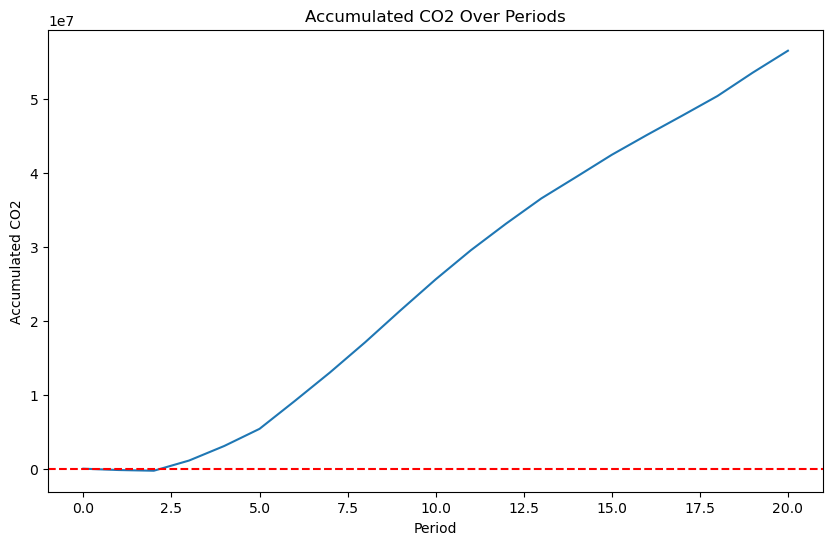

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# First, you want to group by the 'period' column and sum the 'co2_periodic' column
df_co2_periodic_sum = df_co2_periodic.groupby('period')['co2_periodic'].sum().reset_index()

# Accumulated co2
df_co2_periodic_sum['co2_accumulated'] = df_co2_periodic_sum['co2_periodic'].cumsum()

# Adding a row at the beginning with 'co2_accumulated' equals to 0
first_row = pd.DataFrame({'period': [df_co2_periodic_sum['period'].min() - 1], 'co2_accumulated': [0]})
df_co2_periodic_sum = pd.concat([first_row, df_co2_periodic_sum]).reset_index(drop=True)

# Now, you can plot the accumulated CO2 over each period
plt.figure(figsize=(10, 6))
plt.plot(df_co2_periodic_sum['period'], df_co2_periodic_sum['co2_accumulated'])
plt.axhline(0, color='r', linestyle='--')  # adds a red dashed horizontal line at y=0
plt.xlabel('Period')
plt.ylabel('Accumulated CO2')
plt.title('Accumulated CO2 Over Periods')
plt.show()


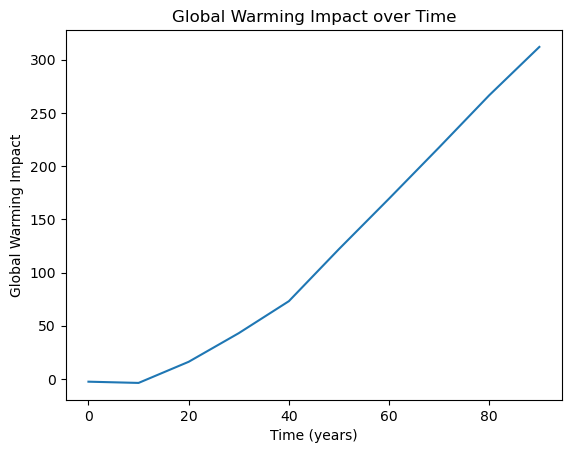

DLCA for TH=100 years is 1.1310425159720463


In [28]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Constants and coefficients
a = [0.2173, 0.2240, 0.2824, 0.2763]  # Assumed values for a0, a1, a2, a3
tau = [394.4, 36.54, 4.304]  # Given values
RE_CO2 = 1.37e-5

# Define C_CO2
def c_co2(t):
    return a[0] + sum(a[i] * np.exp(-t / tau[i - 1]) for i in range(1, 4))

# Define instantaneous DCF
def dcf_instantaneous(t):
    integral_value, err = integrate.quad(lambda t: RE_CO2 * c_co2(t), t - 1, t)
    return integral_value

# Compute cumulative DCF
def dcf_cumulative(t):
    return np.sum([dcf_instantaneous(k) for k in range(t + 1)])

# Compute DLCA
def dlca(TH):
    integral_value, err = integrate.quad(lambda t: RE_CO2 * c_co2(t), 0, TH)
    return dcf_cumulative(TH) / integral_value

# Provided emissions data
emissions = np.array([-1.789226e+05, -9.434218e+04, 1.377330e+06, 1.973506e+06, 2.316534e+06, 3.769070e+06, 3.864988e+06, 4.091251e+06, 4.305578e+06, 4.200783e+06])

# Compute GWI_ins
TH = len(emissions)
GWI_ins = np.zeros(TH)
for t in range(TH):
    GWI_ins[t] = np.sum([emissions[i] * dcf_instantaneous(t - i) for i in range(t + 1)])

# Now plot GWI_ins
plt.plot(np.arange(TH) * 10, GWI_ins)
plt.xlabel('Time (years)')
plt.ylabel('Global Warming Impact')
plt.title('Global Warming Impact over Time')
plt.show()

# Now print DLCA for TH
print(f"DLCA for TH={TH*10} years is {dlca(TH)}")
